In [3]:
# Import all necessary modules
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: c:\Users\gonza\Documents\VSCode Repo\Datathon


# Read all databases

In [5]:
# Reading all the files
nrows = 10000
# balances = pd.read_csv("files/balances.csv", nrows=nrows)
# customers = pd.read_csv("files/customers.csv", nrows=nrows)
# digital = pd.read_csv("files/digital.csv")
# liabilities = pd.read_csv("files/liabilities.csv", nrows=nrows)
# movements = pd.read_csv("files/movements.csv", nrows=nrows)
# sample_submission = pd.read_csv("files/sample_submission.csv", nrows=nrows)
# universe_test = pd.read_csv("files/universe_test.csv")
# universe_train = pd.read_csv("files/universe_train.csv")


# # Reading all the files
# nrows = 10000
balances = pd.read_csv("files/balances.csv")
customers = pd.read_csv("files/customers.csv")
digital = pd.read_csv("files/digital.csv")
liabilities = pd.read_csv("files/liabilities.csv")
movements = pd.read_csv("files/movements.csv")
sample_submission = pd.read_csv("files/sample_submission.csv")
universe_test = pd.read_csv("files/universe_test.csv")
universe_train = pd.read_csv("files/universe_train.csv")

In [6]:
# List of DataFrames
dataframes_list = [
    balances,
    customers,
    digital,
    liabilities,
    movements,
    sample_submission,
    universe_test,
    universe_train
]

dataframe_names = [
    "balances",
    "customers",
    "digital",
    "liabilities",
    "movements",
    "sample_submission",
    "universe_test",
    "universe_train"
]

# Functions for DataFrame Analysis

Function to Print df.info() and df.describe() for a List of DataFrames

In [7]:
# Function to print df.info() for a list of DataFrames
def print_info_for_dataframes(dataframes, names):
    for df, name in zip(dataframes, names):
        print(f"DataFrame Name: {name}")
        print("DataFrame Info:")
        print(df.info())
        print("\n" + "="*50 + "\n")  # Separation line

# Function to print df.describe() for numerical columns in a list of DataFrames
def print_describe_for_dataframes(dataframes, names):
    for df, name in zip(dataframes, names):
        print(f"DataFrame Name: {name}")
        print("DataFrame Summary Statistics:")
        print(df.describe())
        print("\n" + "="*50 + "\n")  # Separation line

def isna_sum(dataframes):
    for df in dataframes:
        print(df.isna().sum())

In [8]:
# Analyze NAs
isna_sum(dataframes_list)

month             0
ID                0
type              0
product           0
entity            0
balance_amount    0
days_default      0
period            0
dtype: int64
ID                       0
age                      0
income                   0
time_from_specialized    0
type_job                 0
bureau_risk              0
payroll                  0
product_1                0
product_2                0
product_3                0
product_4                0
ofert_1                  0
ofert_2                  0
ofert_3                  0
dtype: int64
month     0
ID        0
dig_1     0
dig_2     0
dig_3     0
dig_4     0
dig_5     0
dig_6     0
dig_7     0
dig_8     0
dig_9     0
dig_10    0
dig_11    0
period    0
dtype: int64
month        0
ID           0
product_1    0
product_2    0
period       0
dtype: int64
period    0
ID        0
month     0
type_1    0
type_2    0
type_3    0
type_4    0
dtype: int64
period    0
ID        0
target    0
dtype: int64
ID        0
period   

In [9]:
# Call the function to print info for each DataFrame
print_info_for_dataframes(dataframes_list, dataframe_names)

DataFrame Name: balances
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11597785 entries, 0 to 11597784
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   month           int64  
 1   ID              object 
 2   type            object 
 3   product         object 
 4   entity          object 
 5   balance_amount  float64
 6   days_default    float64
 7   period          object 
dtypes: float64(2), int64(1), object(5)
memory usage: 707.9+ MB
None


DataFrame Name: customers
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809579 entries, 0 to 809578
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     809579 non-null  object 
 1   age                    809579 non-null  float64
 2   income                 809579 non-null  float64
 3   time_from_specialized  809579 non-null  float64
 4   type_job

In [10]:
# Call the function to print summary statistics for each DataFrame
print_describe_for_dataframes(dataframes_list, dataframe_names)

DataFrame Name: balances
DataFrame Summary Statistics:
              month  balance_amount  days_default
count  1.159778e+07    1.159778e+07  1.159778e+07
mean   6.673574e+00    3.703500e+00  1.877785e-01
std    3.449925e+00    6.486027e-01  8.981397e-01
min    1.000000e+00    3.000000e-03  0.000000e+00
25%    4.000000e+00    3.292100e+00  0.000000e+00
50%    7.000000e+00    3.703600e+00  0.000000e+00
75%    1.000000e+01    4.142900e+00  0.000000e+00
max    1.200000e+01    5.000000e+00  5.000000e+00


DataFrame Name: customers
DataFrame Summary Statistics:
                 age         income  time_from_specialized        payroll
count  809579.000000  809579.000000          809579.000000  809579.000000
mean        4.275201       4.284237               1.333632       1.417533
std         0.377544       0.477204               1.946502       2.017392
min         0.000000       0.000000               0.000000       0.000000
25%         4.001100       4.098200               0.000000       0.

# Row level
Analyse what the observations in each database represent

In [22]:
# Looking for duplicated values in balanced data
filt = balances.duplicated(subset = 'ID', keep = False)
print(balances.loc[filt].sort_values('ID').head())
balances.loc[filt].sort_values('ID').shape

      month                                                 ID    type  \
4989      5  001ef9fb6960e24bf3b82405fdec2ff02a1231777d5164...  type_3   
4203      7  001ef9fb6960e24bf3b82405fdec2ff02a1231777d5164...  type_3   
6156      2  01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...  type_3   
4305      7  01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...  type_3   
8953      8  022941e4507975aa15acd9f9afc3836537f84c81c84311...  type_3   

        product    entity  balance_amount  days_default    period  
4989  product_2  entity_3          4.0670           0.0  period_5  
4203  product_1  entity_4          3.7243           0.0  period_5  
6156  product_2  entity_4          3.8435           0.0  period_5  
4305  product_1  entity_1          3.5715           0.0  period_5  
8953  product_1  entity_1          3.1561           0.0  period_8  


(1302, 8)

In [23]:
# Example of duplicated ID in balance
filt = balances['ID'].str.startswith('001ef9fb6960e24bf3b82405fdec2ff02a1231777d5164')
balances.loc[filt].head()
# For this ID, they have two different products in different entities and months

filt = balances['ID'].str.startswith('001ef9fb6960e24bf3b82405fdec2ff02a1231777d5164')
balances.loc[filt].head()
# For this ID, they have two different products in different entities and months

filt = balances['ID'].str.startswith('01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659')
balances.loc[filt].head()
# For this ID, they have two different products in different entities and months

,month,ID,type,product,entity,balance_amount,days_default,period
4305,7,01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...,type_3,product_1,entity_1,3.5715,0.0,period_5
6156,2,01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...,type_3,product_2,entity_4,3.8435,0.0,period_5


In [24]:
# Pivoting longer based on entity and balance_amount
balances_long = balances.pivot(index=['month', 'ID', 'type', 'product', 'days_default', 'period'],
                                  columns='entity',
                                  values='balance_amount').reset_index()
filt = balances_long['ID'].str.startswith('01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659')
balances_long.loc[filt].head()


entity,month,ID,type,product,days_default,period,entity_1,entity_2,entity_3,entity_4,entity_5
741,2,01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...,type_3,product_2,0.0,period_5,NaN,NaN,NaN,3.8435,NaN
4720,7,01fdcf9c7be2a57be20b46a01207a2c6eded5f5bd0a659...,type_3,product_1,0.0,period_5,3.5715,NaN,NaN,NaN,NaN


In [25]:
# Looking for duplicated values in customers data
filt = customers.duplicated(subset = 'ID', keep = False)
print(customers.loc[filt].sort_values('ID').head())
customers.loc[filt].sort_values('ID').shape
# No duplicated values

Empty DataFrame
Columns: [ID, age, income, time_from_specialized, type_job, bureau_risk, payroll, product_1, product_2, product_3, product_4, ofert_1, ofert_2, ofert_3]
Index: []


(0, 14)

In [26]:
# Looking for duplicated values in digital data
filt = digital.duplicated(subset = 'ID', keep = False)
print(digital.loc[filt].sort_values('ID').head())
digital.loc[filt].sort_values('ID').shape
# Same IDs can have information for different months

         month                                                 ID   dig_1  \
370595      10  00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...  1.8204   
2276799      9  00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...  0.4532   
2906190     11  00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...  2.1448   
3071126      2  00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...  0.0000   
500102       3  00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...  1.5700   

          dig_2   dig_3   dig_4   dig_5   dig_6   dig_7   dig_8   dig_9  \
370595   4.2168  3.5088  2.7366  1.0714  3.8594  3.9430  3.5336  4.1501   
2276799  3.9451  3.6362  2.5198  1.1212  3.7477  1.5996  2.7497  3.0187   
2906190  4.0066  3.7812  2.9244  1.6450  3.9505  3.4914  3.5336  3.4016   
3071126  1.0457  2.0514  4.0648  3.7246  4.1363  0.0000  0.0000  1.6315   
500102   3.3019  3.3263  1.9496  0.6968  4.1593  2.6089  2.4699  3.1059   

         dig_10  dig_11    period  
370595   1.9388  3.9845  period_6  
2276799  0.000

(6348901, 14)

In [27]:
# Looking for duplicated values in liabilities data
filt = liabilities.duplicated(subset = 'ID', keep = False)
print(liabilities.loc[filt].sort_values('ID').head())
liabilities.loc[filt].sort_values('ID').shape
# Same IDs can have information for different months

      month                                                 ID  product_1  \
1350     12  004a1e3a95c59b397bb6ae1b86249b0297250f83e34173...     2.7607   
1351      6  004a1e3a95c59b397bb6ae1b86249b0297250f83e34173...     2.6079   
2547     11  012c48156d5b461da855f5222097ed71fe7cec3b7a5e2e...     3.8268   
2546      3  012c48156d5b461da855f5222097ed71fe7cec3b7a5e2e...     4.4214   
4432      3  024a9419a1137ba57548f5086b16d92a902d9fbe533208...     3.6220   

      product_2    period  
1350     0.0000  period_5  
1351     0.0000  period_5  
2547     4.5412  period_5  
2546     0.0000  period_5  
4432     0.0000  period_5  


(527, 5)

In [28]:
# Looking for duplicated values in movements data
filt = movements.duplicated(subset = 'ID', keep = False)
print(movements.loc[filt].sort_values('ID').head())
movements.loc[filt].sort_values('ID').shape
# Same IDs can have information for different months

        period                                                 ID  month  \
9415  period_9  00b44b454fa0f96a88b8fea35cbf947d7081ea70306ecb...      9   
9416  period_9  00b44b454fa0f96a88b8fea35cbf947d7081ea70306ecb...      5   
543   period_9  00f6645a07577ff8a2425bd244d4c368b5a79e1a077bae...      8   
9434  period_9  00f6645a07577ff8a2425bd244d4c368b5a79e1a077bae...     11   
6095  period_9  00fd54e1da21820ccce75a55d3bfd72a49ecf9f610cfde...      2   

      type_1  type_2  type_3  type_4  
9415  2.8854  0.0000     0.0  3.4483  
9416  0.0000  3.8939     0.0  3.4483  
543   0.0000  3.8360     0.0  0.0000  
9434  0.0000  4.1836     0.0  0.0000  
6095  0.0000  0.0000     0.0  4.5148  


(1886, 7)

# Data Cleaning

universe_train

In [29]:
# Transform attrition to a Category
try:
    universe_train['attrition'] = universe_train['attrition'].astype('category')
except:
    pass
universe_train.value_counts()

ID                                                                attrition  period  
00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd92ba7d880f22dfc0c4a  1          period_6    1
aada068586d517135521f8e6789b88bcf3ae8750d4a7f914ad4384e7770f0e39  0          period_5    1
aad9f65eed1c695d62c1f4aee0000ef1ed9a85d05fd2cbd22b8382a48440c330  0          period_2    1
aad9bdd6c486d2487920316a1151f8631975c4513f35d8269c6685e084f61971  0          period_6    1
aad9bcc9e93ec81ab9930eb158030bf04f51d8747c082754abc884c5d1e30c6b  0          period_6    1
                                                                                        ..
558602858281b924504d5bd7b69a6ab2599c6cb88bdf8513564497e0bd330af2  0          period_1    1
5585eff96777ad6e88c7bc878aa66c529b15b5caffb36638662b970ea3f41cb9  0          period_3    1
5585ebcaab14e527d756dbe67b03c7368def6e7267194f5d630a8d57a4c35ca9  0          period_2    1
5585e26e75e51581246831fadecb656a89e54ce01407f84719db121de4a804af  0          period_3    1
ffff

balances

In [30]:
# type, period, product and entity should be categories
balances.head()

# How should we store month?
# List of columns for which you want to perform value_counts
columns_to_count = ['type', 'product', 'entity', 'period']

# Transform type, period, product and entity to a Category
try:
    for column in columns_to_count:
        balances[column] = balances[column].astype('category')
except:
    pass

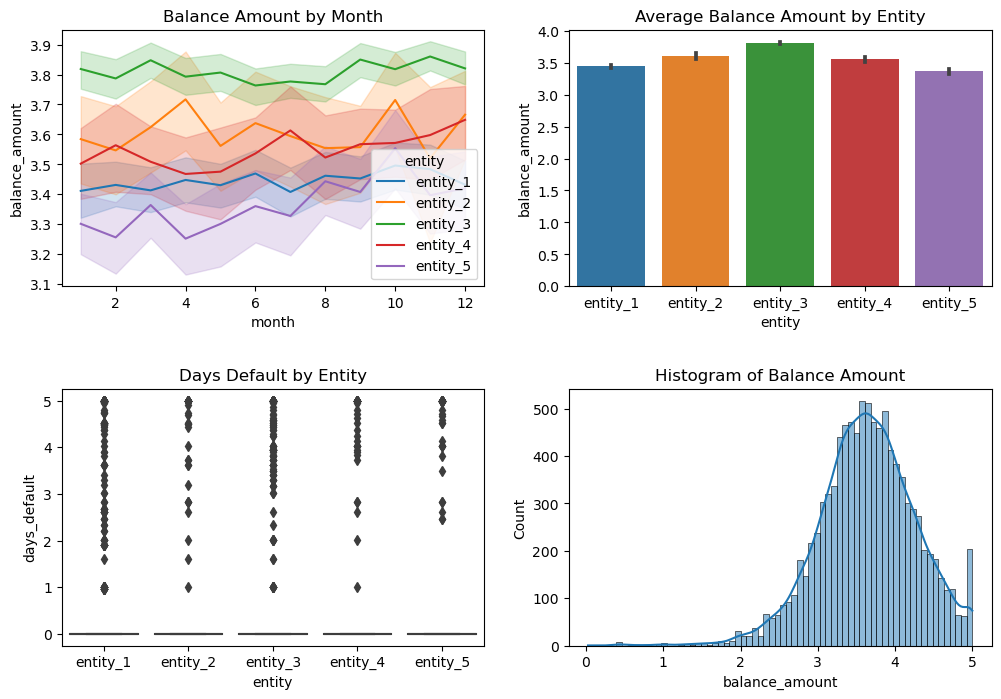

In [31]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Plot 1: Line plot of balance_amount by month
sns.lineplot(data=balances, x='month', y='balance_amount', hue='entity', ax=axes[0, 0])
axes[0, 0].set_title('Balance Amount by Month')

# Plot 2: Bar plot of average balance_amount by entity
sns.barplot(data=balances, x='entity', y='balance_amount', ax=axes[0, 1])
axes[0, 1].set_title('Average Balance Amount by Entity')

# Plot 3: Box plot of days_default by entity
sns.boxplot(data=balances, x='entity', y='days_default', ax=axes[1, 0])
axes[1, 0].set_title('Days Default by Entity')

# Plot 4: Histogram of balance_amount
sns.histplot(data=balances, x='balance_amount', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Balance Amount')

# Show plots
plt.show()

In [32]:
balances_y = pd.merge(left = balances, right = universe_train, on = 'ID', how = 'inner', suffixes=['_balance,', '_universe'])
balances_y.shape
balances_y.columns

Index(['month', 'ID', 'type', 'product', 'entity', 'balance_amount',
       'days_default', 'period_balance,', 'attrition', 'period_universe'],
      dtype='object')

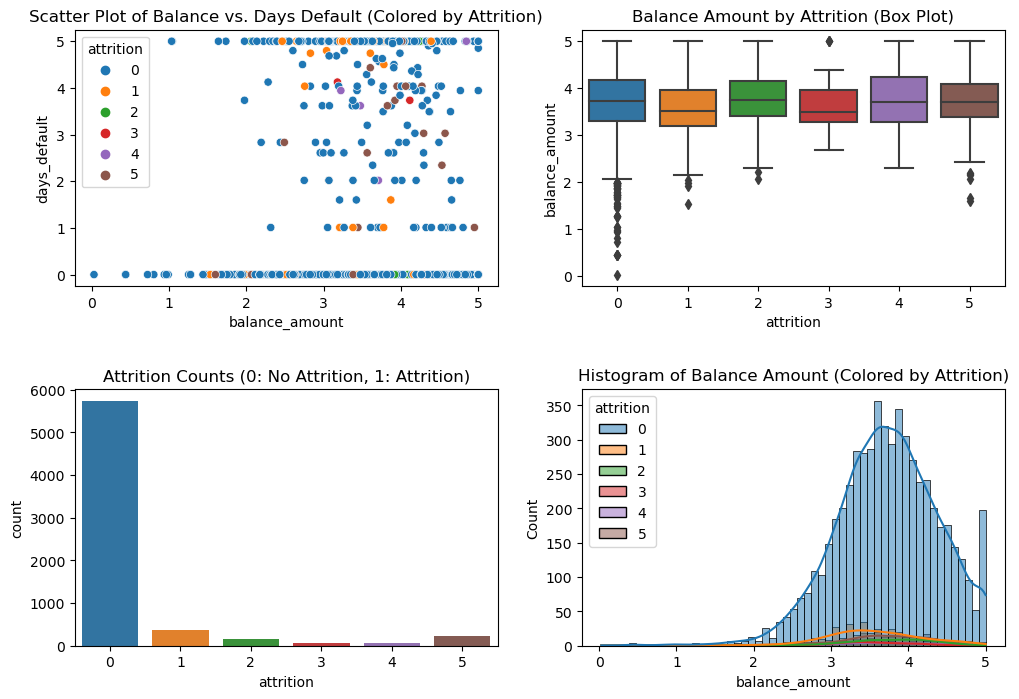

In [33]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Plot 1: Scatter plot of balance_amount vs. days_default, colored by attrition
sns.scatterplot(data=balances_y, x='balance_amount', y='days_default', hue='attrition', ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of Balance vs. Days Default (Colored by Attrition)')

# Plot 2: Box plot of balance_amount by attrition
sns.boxplot(data=balances_y, x='attrition', y='balance_amount', ax=axes[0, 1])
axes[0, 1].set_title('Balance Amount by Attrition (Box Plot)')

# Plot 3: Bar plot of attrition counts
sns.countplot(data=balances_y, x='attrition', ax=axes[1, 0])
axes[1, 0].set_title('Attrition Counts (0: No Attrition, 1: Attrition)')

# Plot 4: Histogram of balance_amount, separated by attrition
sns.histplot(data=balances_y, x='balance_amount', kde=True, hue='attrition', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Balance Amount (Colored by Attrition)')

# Show plots
plt.show()

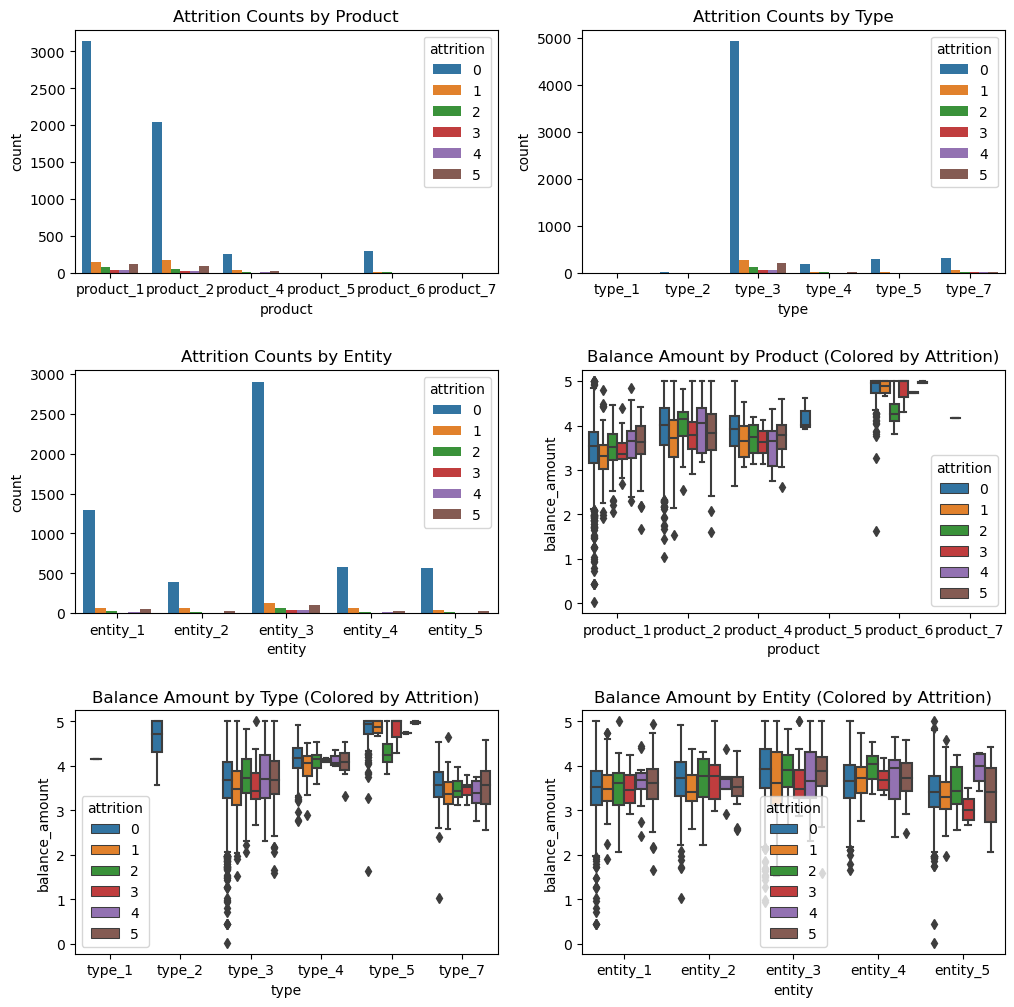

In [34]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4)

# Plot 1: Bar plot of attrition counts by product
sns.countplot(data=balances_y, x='product', hue='attrition', ax=axes[0, 0])
axes[0, 0].set_title('Attrition Counts by Product')

# Plot 2: Bar plot of attrition counts by type
sns.countplot(data=balances_y, x='type', hue='attrition', ax=axes[0, 1])
axes[0, 1].set_title('Attrition Counts by Type')

# Plot 3: Bar plot of attrition counts by entity
sns.countplot(data=balances_y, x='entity', hue='attrition', ax=axes[1, 0])
axes[1, 0].set_title('Attrition Counts by Entity')

# Plot 4: Box plot of balance_amount by product, colored by attrition
sns.boxplot(data=balances_y, x='product', y='balance_amount', hue='attrition', ax=axes[1, 1])
axes[1, 1].set_title('Balance Amount by Product (Colored by Attrition)')

# Plot 5: Box plot of balance_amount by type, colored by attrition
sns.boxplot(data=balances_y, x='type', y='balance_amount', hue='attrition', ax=axes[2, 0])
axes[2, 0].set_title('Balance Amount by Type (Colored by Attrition)')

# Plot 6: Box plot of balance_amount by entity, colored by attrition
sns.boxplot(data=balances_y, x='entity', y='balance_amount', hue='attrition', ax=axes[2, 1])
axes[2, 1].set_title('Balance Amount by Entity (Colored by Attrition)')

# Show plots
plt.show()

digital

In [35]:
digital_y = pd.merge(left = digital, right = universe_train, on = 'ID', how = 'inner', suffixes=['_digital,', '_universe'])
digital_y.shape

(4206677, 16)

In [36]:
digital.head()

,month,ID,dig_1,dig_2,dig_3,dig_4,dig_5,dig_6,dig_7,dig_8,dig_9,dig_10,dig_11,period
0,9,bdc817ca1b6ba0deb42d70bee75e4a4e1a1df5d3c9578c...,0.7329,2.2512,2.9029,3.8084,3.0466,3.2779,0.0000,1.0905,2.2750,0.0000,1.7480,period_9
1,3,7474e915adcf95e11cd85fe1dcb660fee704697ae31f87...,4.2287,4.6974,2.9029,2.7366,2.2263,4.1667,1.9824,1.0905,1.6208,0.0000,0.9672,period_9
2,11,506ff183d63da44a9106db1202b2b9cc53ca680ddca44d...,1.7268,3.8201,2.7194,2.5198,1.4561,4.2153,4.2105,2.1810,3.6138,0.0000,3.3457,period_9
3,4,f59effceec688938accd3f6b5d0684edb2ad484e7bef40...,0.0326,1.6499,1.6981,3.7114,2.9214,3.0473,0.0000,1.0905,2.2750,1.1569,1.7480,period_9
4,3,a0d7da88c4d28b52afba4f4bfa066356042bb0bfe8be8b...,2.1337,4.0528,3.3814,2.9244,1.3486,4.3069,3.6679,1.7284,3.5024,0.0000,3.2128,period_9


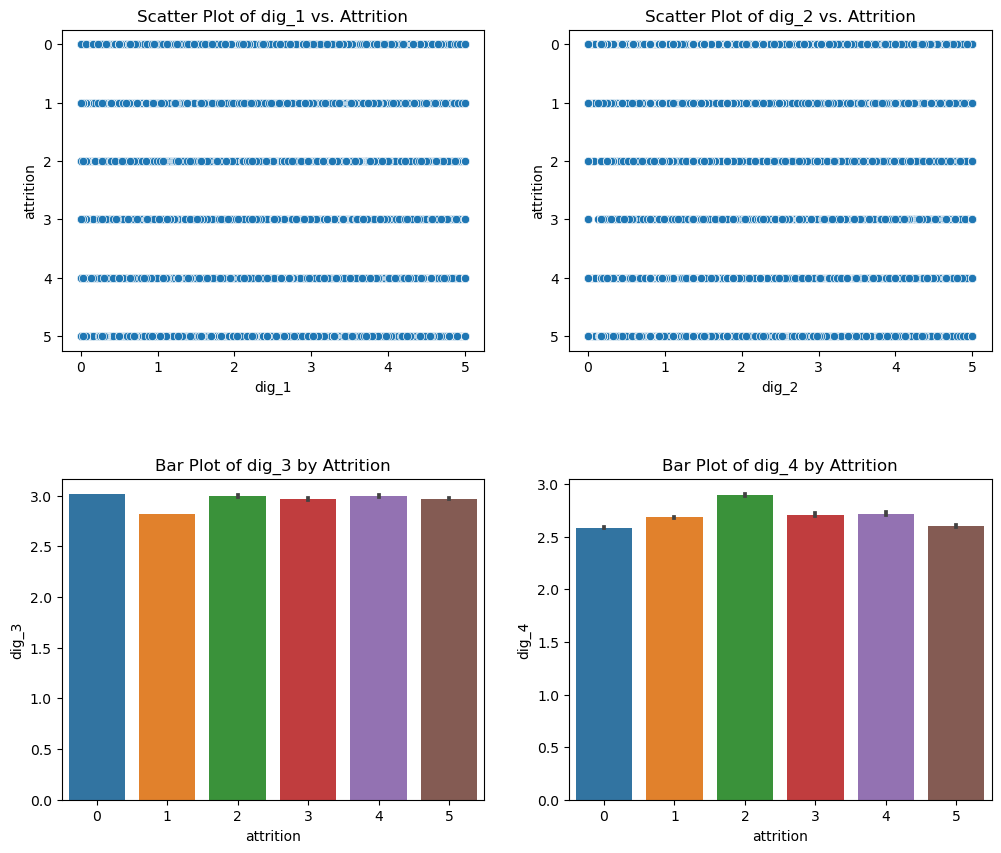

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

# Plot 1: Scatter plot of 'dig_1' vs. 'attrition'
sns.scatterplot(data=digital_y, x='dig_1', y='attrition', ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot of dig_1 vs. Attrition')

# Plot 2: Scatter plot of 'dig_2' vs. 'attrition'
sns.scatterplot(data=digital_y, x='dig_2', y='attrition', ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot of dig_2 vs. Attrition')

# Plot 3: Bar plot of 'dig_3' by 'attrition'
sns.barplot(data=digital_y, x='attrition', y='dig_3', ax=axes[1, 0])
axes[1, 0].set_title('Bar Plot of dig_3 by Attrition')

# Plot 4: Bar plot of 'dig_4' by 'attrition'
sns.barplot(data=digital_y, x='attrition', y='dig_4', ax=axes[1, 1])
axes[1, 1].set_title('Bar Plot of dig_4 by Attrition')

# Show plots
plt.show()

In [49]:
# Merge universe_test with other DataFrames
merged_test = universe_test.merge(balances, on=['ID', 'period'], how='left', suffixes=['_universe,', '_balances'])
merged_test = merged_test.merge(customers, on='ID', how='left', suffixes=['_balances', '_customers'])
merged_test = merged_test.merge(liabilities, on='ID', how='left', suffixes=['_customers', '_liabilities'])
merged_test = merged_test.merge(digital, on='ID', how='left', suffixes=['_liabilities', '_digital'])
merged_test = merged_test.merge(movements, on='ID', how='left', suffixes=['_digital', '_movements'])

# Merge universe_train with other DataFrames
merged_train = universe_train.merge(balances, on='ID', how='left')
merged_train = merged_train.merge(customers, on='ID', how='left')
merged_train = merged_train.merge(digital, on='ID', how='left')
merged_train = merged_train.merge(liabilities, on='ID', how='left')
merged_train = merged_train.merge(movements, on='ID', how='left')


C:\Users\gonza\AppData\Local\Temp\ipykernel_14288\1098329014.py:12: FutureWarning: Passing 'suffixes' which cause duplicate columns {'period_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_train = merged_train.merge(liabilities, on='ID', how='left')
C:\Users\gonza\AppData\Local\Temp\ipykernel_14288\1098329014.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'month_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_train = merged_train.merge(movements, on='ID', how='left')


In [40]:
print(merged_test.shape, merged_train.shape)

(83872, 45) (4322710, 46)


In [34]:
print(universe_test.shape)
print(balances.shape)

(273636, 2)
(11597785, 8)


In [12]:
# Merge universe_test with balances
merged_test = pd.merge(left = universe_test, right = balances, on=['ID', 'period'], how='left', suffixes=['_universe,', '_balances'])
print(merged_test.shape)
merged_test.isna().sum()

(4129208, 8)


ID                     0
period                 0
month             100594
type              100594
product           100594
entity            100594
balance_amount    100594
days_default      100594
dtype: int64

In [39]:
# Example of duplicated ID in balance
filt = merged_test['ID'].str.startswith('20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7')
merged_test.loc[filt].sort_values(by = 'month').head(n=10)
# There are multiple months, products and entities per ID.

,ID,period,month,type,product,entity,balance_amount,days_default
32,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,1.0,type_3,product_2,entity_3,4.5466,0.0
26,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,1.0,type_3,product_1,entity_1,3.7171,0.0
2,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,2.0,type_3,product_1,entity_3,3.5370,0.0
14,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,2.0,type_3,product_1,entity_1,3.7389,0.0
6,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,2.0,type_3,product_2,entity_3,4.5421,0.0
9,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,3.0,type_3,product_1,entity_3,3.8081,0.0
48,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,3.0,type_3,product_2,entity_3,4.5375,0.0
44,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,3.0,type_3,product_1,entity_1,3.6137,0.0
1,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,4.0,type_3,product_1,entity_3,3.7968,0.0
15,20b427c65c62ee0177adfa300bbf9f93ba2e46c86d5bc7...,period_9,4.0,type_3,product_2,entity_3,4.5328,0.0


In [43]:
# Dummy encode 'product' and 'entity' columns during aggregation
dummy_product = pd.get_dummies(merged_test['product'], prefix='product')
dummy_entity = pd.get_dummies(merged_test['entity'], prefix='entity')
dummy_type = pd.get_dummies(merged_test['type'], prefix='type')
merged_test_dummy = pd.concat([merged_test[['ID', 'period', 'month', 'balance_amount', 'days_default']], dummy_product, dummy_entity, dummy_type], axis=1)

agg_df = merged_test_dummy.groupby(['ID', 'period']).agg({
    # Create aggregations as specified
    'month': 'count',
    'balance_amount': [len, sum, min, max, np.median, np.std],
    'days_default': [len, sum, min, max, np.median, np.std],
    # Dummification
    # Select columns with a specific prefix (e.g., 'product_' or 'entity_') and sum them
    **{col: 'sum' for col in merged_test_dummy.head().columns if col.startswith('product_')},
    **{col: 'sum' for col in merged_test_dummy.head().columns if col.startswith('entity_')},
    **{col: 'sum' for col in merged_test_dummy.head().columns if col.startswith('type_')}
}).reset_index()

# Display the aggregated DataFrame with single-level column headers
agg_df.columns = agg_df.columns.map('_'.join)  # Join the multi-level column names with an underscore
agg_df.reset_index(drop=True, inplace=True)     # Reset the index and drop the old index

print(agg_df.shape)
agg_df.head()


(273636, 33)


,ID_,period_,month_count,balance_amount_len,balance_amount_sum,balance_amount_min,balance_amount_max,balance_amount_median,balance_amount_std,days_default_len,...,entity_entity_2_sum,entity_entity_3_sum,entity_entity_4_sum,entity_entity_5_sum,type_type_1_sum,type_type_2_sum,type_type_3_sum,type_type_4_sum,type_type_5_sum,type_type_7_sum
0,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,period_8,31,31,102.7161,1.7495,3.9005,3.43610,0.395140,31,...,0,12,0,12,0,0,31,0,0,0
1,0000bb1dfb27cfb704a54c9b395b443461ff80e5dee265...,period_9,0,1,0.0000,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,0000bf7ea0097a88c482e99ab814e6c4c4495b5a35e520...,period_9,70,70,263.7359,2.7129,4.4651,3.85815,0.509724,70,...,14,0,24,32,0,0,16,44,0,10
3,0001110f8a89588fcc69ba47e95c4c358c43891b979122...,period_7,7,7,23.1012,1.9785,4.1486,3.53750,0.715511,7,...,0,7,0,0,0,0,7,0,0,0
4,000127272ce7dfd1d710743f99d0cf5c2aded963e117b5...,period_9,1,1,0.1497,0.1497,0.1497,0.14970,NaN,1,...,0,1,0,0,0,0,1,0,0,0


In [66]:
merged_test = merged_test.merge(customers, on='ID', how='left', suffixes=['_balances', '_customers'])
print(merged_test.shape)
merged_test.isna().sum()

ID                            0
period                        0
month                    100594
type                     100594
product                  100594
entity                   100594
balance_amount           100594
days_default             100594
age                           0
income                        0
time_from_specialized         0
type_job                      0
bureau_risk                   0
payroll                       0
product_1                     0
product_2                     0
product_3                     0
product_4                     0
ofert_1                       0
ofert_2                       0
ofert_3                       0
dtype: int64

In [67]:
merged_test = merged_test.merge(liabilities, on='ID', how='left', suffixes=['_customers', '_liabilities'])
print(merged_test.shape)
merged_test.isna().sum()

(44365641, 25)


ID                             0
period_customers               0
month_customers          1124112
type                     1124112
product                  1124112
entity                   1124112
balance_amount           1124112
days_default             1124112
age                            0
income                         0
time_from_specialized          0
type_job                       0
bureau_risk                    0
payroll                        0
product_1_customers            0
product_2_customers            0
product_3                      0
product_4                      0
ofert_1                        0
ofert_2                        0
ofert_3                        0
month_liabilities         173878
product_1_liabilities     173878
product_2_liabilities     173878
period_liabilities        173878
dtype: int64

In [68]:
merged_test = merged_test.merge(digital, on='ID', how='left', suffixes=['_liabilities', '_digital'])
print(merged_test.shape)
merged_test.isna().sum()

In [ ]:
merged_test = merged_test.merge(movements, on='ID', how='left', suffixes=['_digital', '_movements'])
print(merged_test.shape)
merged_test.isna().sum()

ID                           0
period_customers             0
month_customers          83872
type                     83872
product                  83872
entity                   83872
balance_amount           83872
days_default             83872
age                      80121
income                   80121
time_from_specialized    80121
type_job                 80121
bureau_risk              80121
payroll                  80121
product_1_customers      80121
product_2_customers      80121
product_3                80121
product_4                80121
ofert_1                  80121
ofert_2                  80121
ofert_3                  80121
month_liabilities        79301
product_1_liabilities    79301
product_2_liabilities    79301
period_liabilities       79301
month_digital             1872
dig_1                     1872
dig_2                     1872
dig_3                     1872
dig_4                     1872
dig_5                     1872
dig_6                     1872
dig_7   